<a href="https://colab.research.google.com/github/Oukofredd/Machine-Learning/blob/main/assignment_on_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM OF THE STATEMENT**

The term "cancer" was first used around 400 BCE by Hippocrates, an Ancient Greek physician known as the "Father of Medicine". Since then cancer has become a menance to the society. The expensive nature of cancer treatment and difficulty in early detection has disrupted nomalcy in the life of the affected. Lifestyle factors such as alcohol consumption and flashy uncheked lifestyle has been said to contribute to different types of cancers.

This study aims to look deeper into the clustering results to identify specific patterns within each cluster and determine the characteristics that define these groups. It also seeks toexplore the potential public health implications of the observed relationships. Ultimately, the goal is to provide insights that can inform effective strategies for reducing cancer mortality associated with lifestyle factors such as alcohol consumption and smoking.



In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:

# reading of the data
from google.colab import files
uploaded=files.upload()

Saving Cancer - Sheet1.csv to Cancer - Sheet1.csv


In [ ]:
import pandas as pd

# Read the uploaded CSV file
fr = pd.read_csv('Cancer - Sheet1.csv')
fr


,Country or Territory,"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",Smoking prevalence male\nPrevalence (%) of daily smoking for men,Smoking prevalence female\nPrevalence (%) of daily smoking for women,"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country","Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016","Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016","Melanoma skin cancer incidence\nAge-standardized rate (world) per 100,000, both sexes, 2018",Breastfeeding at 12 months\nPercent (%) of children who receive any breast milk at 12 months of age,Average births per woman\n2010-2015,...,"Most common cancer cases worldwide, females\n2018","Most common cancer deaths worldwide, females\n2018","Most common cancer cases worldwide, males\n2018","Most common cancer deaths worldwide, males\n2018","Cancer survivors\nEstimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, 2018","Years lived with disability due to cancer\nBoth sexes, all ages, 2017","Hepatitis B virus vaccination\nHepatitis B vaccination coverage (% of one-year-olds who have received three doses of hepatitis B vaccine), 2017","Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients","Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018","HIV prevalence (%)\nBoth sexes, 2017"
0,Afghanistan,0.5,21.4,7,16,3.2,7.6,0.3,88,5.3,...,Breast,Breast,"Lip, oral cavity",Stomach,151,8089.8,65,0,6.6,No data
1,Algeria,1.1,17.5,2.2,12.9,19.9,34.9,0.7,55.1,3,...,Breast,Breast,Lung,Lung,312.6,16404.9,91,0.75,8.1,0.05
2,Azerbaijan,3.2,36.7,0.3,15.4,15.8,23.6,0.53,36.1,2.1,...,Breast,Breast,Lung,Lung,228.1,6685.1,95,0.86,6.5,0.1
3,Albania,4.9,40.9,6.1,13.4,21.6,21.8,1.7,72.3,1.7,...,Breast,Breast,Lung,Lung,401.1,2644.3,99,0.6,6.5,0.05
4,Armenia,5,43.5,1.5,12.2,17.1,23,1.6,52.3,1.7,...,Breast,Breast,Lung,Lung,402.2,3418,94,0.34,8.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Réunion,No data,No data,No data,12.4,No data,No data,3.3,No data,2.4,...,Breast,Breast,Prostate,Lung,590.1,No data,No data,No data,10.5,No data
203,French Polynesia,No data,No data,No data,6.6,No data,No data,6.5,No data,2.1,...,Breast,Lung,Prostate,Lung,661.9,No data,No data,No data,10.1,No data
204,Guadeloupe,No data,No data,No data,10.2,No data,No data,1.5,No data,2,...,Breast,Breast,Prostate,Prostate,776.5,No data,No data,0.88,9.3,No data
205,Guam,No data,No data,No data,8.5,No data,No data,No data,No data,2.4,...,Breast,Lung,Lung,Lung,418,168.8,No data,2.58,18.7,No data


In [ ]:
#checking for missing values
print(fr.isnull().sum())
#encode categorical variable 'Human Development Index (HDI) levels\n2017'
le=LabelEncoder()
fr['Human Development Index (HDI) levels\n2017']=le.fit_transform(fr['Human Development Index (HDI) levels\n2017'])

Country or Territory                                                                                                                                          0
Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016                         0
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                                              0
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                                          0
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                                          0
Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016                                                                           0
Obesity prevalence female\nInternational

In [ ]:
print(fr.columns)

Index(['Country or Territory',
       'Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016',
       'Smoking prevalence male\nPrevalence (%) of daily smoking for men',
       'Smoking prevalence female\nPrevalence (%) of daily smoking for women',
       'Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country',
       'Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016',
       'Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016',
       'Melanoma skin cancer incidence\nAge-standardized rate (world) per 100,000, both sexes, 2018',
       'Breastfeeding at 12 months\nPercent (%) of children who receive any breast milk at 12 months of age',
       'Average births per woman\n2010-2015',
       'Outdoor air pollution\nAverage annual population-weighted concentrations of PM2.5 (particulate matter of

In [ ]:
# selecting features for clustering purposes
x = ['Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016',
    'Smoking prevalence male\nPrevalence (%) of daily smoking for men',
    'Smoking prevalence female\nPrevalence (%) of daily smoking for women',
    'Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country',
    'Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016',
    'Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016',
    'Outdoor air pollution\nAverage annual population-weighted concentrations of PM2.5 (particulate matter of 2.5 μm diameter or less), measured in μg/m3, 2017',
    'Indoor air pollution\nProportion (%) of population using solid fuels in 2017',
    'Lung cancer incidence rates, male\nAge-standardized rate (world) per 100,000, all ages, 2018',
    'Lung cancer incidence rates, female\nAge-standardized rate (world) per 100,000, all ages, 2018','Human Development Index (HDI) levels\n2017'
]
select_fr=fr[x]
select_fr


,"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",Smoking prevalence male\nPrevalence (%) of daily smoking for men,Smoking prevalence female\nPrevalence (%) of daily smoking for women,"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country","Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016","Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016","Outdoor air pollution\nAverage annual population-weighted concentrations of PM2.5 (particulate matter of 2.5 μm diameter or less), measured in μg/m3, 2017",Indoor air pollution\nProportion (%) of population using solid fuels in 2017,"Lung cancer incidence rates, male\nAge-standardized rate (world) per 100,000, all ages, 2018","Lung cancer incidence rates, female\nAge-standardized rate (world) per 100,000, all ages, 2018",Human Development Index (HDI) levels\n2017
0,0.5,21.4,7,16,3.2,7.6,57,71,9.4,3.2,1
1,1.1,17.5,2.2,12.9,19.9,34.9,39,0.32,17.4,2.9,0
2,3.2,36.7,0.3,15.4,15.8,23.6,20,15,25.5,2.6,0
3,4.9,40.9,6.1,13.4,21.6,21.8,18,35,37.8,7.1,0
4,5,43.5,1.5,12.2,17.1,23,33,16,58.5,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...
202,No data,No data,No data,12.4,No data,No data,No data,No data,34.6,9.6,3
203,No data,No data,No data,6.6,No data,No data,No data,No data,55.7,23.4,3
204,No data,No data,No data,10.2,No data,No data,No data,No data,13,6.5,3
205,No data,No data,No data,8.5,No data,No data,12,7.7,53.7,24.3,3


In [ ]:
select_fr.dtypes

,0
"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",object
Smoking prevalence male\nPrevalence (%) of daily smoking for men,object
Smoking prevalence female\nPrevalence (%) of daily smoking for women,object
"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country",object
"Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016",object
"Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016",object
"Outdoor air pollution\nAverage annual population-weighted concentrations of PM2.5 (particulate matter of 2.5 μm diameter or less), measured in μg/m3, 2017",object
Indoor air pollution\nProportion (%) of population using solid fuels in 2017,object
"Lung cancer incidence rates, male\nAge-standardized rate (world) per 100,000, all ages, 2018",object
"Lung cancer incidence rates, female\nAge-standardized rate (world) per 100,000, all ages, 2018",object


In [ ]:
num_cols=['Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016',
    'Smoking prevalence male\nPrevalence (%) of daily smoking for men',
    'Smoking prevalence female\nPrevalence (%) of daily smoking for women',
    'Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country',
    'Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016',
    'Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016',
    'Outdoor air pollution\nAverage annual population-weighted concentrations of PM2.5 (particulate matter of 2.5 μm diameter or less), measured in μg/m3, 2017',
    'Indoor air pollution\nProportion (%) of population using solid fuels in 2017',
    'Lung cancer incidence rates, male\nAge-standardized rate (world) per 100,000, all ages, 2018',
    'Lung cancer incidence rates, female\nAge-standardized rate (world) per 100,000, all ages, 2018','Human Development Index (HDI) levels\n2017']
numeric_x=select_fr[num_cols]
numeric_x


,"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",Smoking prevalence male\nPrevalence (%) of daily smoking for men,Smoking prevalence female\nPrevalence (%) of daily smoking for women,"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country","Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016","Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016","Outdoor air pollution\nAverage annual population-weighted concentrations of PM2.5 (particulate matter of 2.5 μm diameter or less), measured in μg/m3, 2017",Indoor air pollution\nProportion (%) of population using solid fuels in 2017,"Lung cancer incidence rates, male\nAge-standardized rate (world) per 100,000, all ages, 2018","Lung cancer incidence rates, female\nAge-standardized rate (world) per 100,000, all ages, 2018",Human Development Index (HDI) levels\n2017
0,0.5,21.4,7,16,3.2,7.6,57,71,9.4,3.2,1
1,1.1,17.5,2.2,12.9,19.9,34.9,39,0.32,17.4,2.9,0
2,3.2,36.7,0.3,15.4,15.8,23.6,20,15,25.5,2.6,0
3,4.9,40.9,6.1,13.4,21.6,21.8,18,35,37.8,7.1,0
4,5,43.5,1.5,12.2,17.1,23,33,16,58.5,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...
202,No data,No data,No data,12.4,No data,No data,No data,No data,34.6,9.6,3
203,No data,No data,No data,6.6,No data,No data,No data,No data,55.7,23.4,3
204,No data,No data,No data,10.2,No data,No data,No data,No data,13,6.5,3
205,No data,No data,No data,8.5,No data,No data,12,7.7,53.7,24.3,3


In [ ]:
numeric_x.isnull().sum()

,0
"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",0
Smoking prevalence male\nPrevalence (%) of daily smoking for men,0
Smoking prevalence female\nPrevalence (%) of daily smoking for women,0
"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country",0
"Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016",0
"Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016",0
"Outdoor air pollution\nAverage annual population-weighted concentrations of PM2.5 (particulate matter of 2.5 μm diameter or less), measured in μg/m3, 2017",0
Indoor air pollution\nProportion (%) of population using solid fuels in 2017,0
"Lung cancer incidence rates, male\nAge-standardized rate (world) per 100,000, all ages, 2018",0
"Lung cancer incidence rates, female\nAge-standardized rate (world) per 100,000, all ages, 2018",0


In [ ]:
#checking for duplicates
numeric_x.duplicated().sum()

5

In [ ]:
#dropping the existing duplicates
numeric_x.drop_duplicates(inplace=True)


In [ ]:
#rechecking if duplicates were dropped
numeric_x.duplicated().sum()

0

In [ ]:
#converting No Data to NaN
numeric_x.replace('No data',np.nan, inplace=True)

In [ ]:
imputer = SimpleImputer(strategy='mean')
numeric_xf= imputer.fit_transform(numeric_x)
numeric_xf

array([[ 0.5       , 21.4       ,  7.        , ...,  9.4       ,
         3.2       ,  1.        ],
       [ 1.1       , 17.5       ,  2.2       , ..., 17.4       ,
         2.9       ,  0.        ],
       [ 3.2       , 36.7       ,  0.3       , ..., 25.5       ,
         2.6       ,  0.        ],
       ...,
       [ 5.31878453, 23.64516129,  7.12819149, ..., 13.        ,
         6.5       ,  3.        ],
       [ 5.31878453, 23.64516129,  7.12819149, ..., 53.7       ,
        24.3       ,  3.        ],
       [ 5.31878453, 23.64516129,  7.12819149, ..., 12.3       ,
         9.2       ,  3.        ]])

In [ ]:
numeric_x.describe()

,Human Development Index (HDI) levels\n2017
count,202.000000
mean,1.920792
std,1.559329
min,0.000000
25%,0.000000
50%,2.000000
75%,4.000000
max,4.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_xf)
X_scaled

array([[-1.73372041e+00, -2.00762130e-01, -1.82894329e-02, ...,
        -7.57162925e-01, -7.57350102e-01, -5.91972555e-01],
       [-1.51785015e+00, -5.49499796e-01, -7.03118656e-01, ...,
        -3.02057483e-01, -7.93352510e-01, -1.23486748e+00],
       [-7.62304260e-01,  1.16736256e+00, -9.74196890e-01, ...,
         1.58736777e-01, -8.29354918e-01, -1.23486748e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -1.26718862e-16, ...,
        -5.52365476e-01, -3.61323614e-01,  6.93817296e-01],
       [ 0.00000000e+00,  0.00000000e+00, -1.26718862e-16, ...,
         1.76298346e+00,  1.77481926e+00,  6.93817296e-01],
       [ 0.00000000e+00,  0.00000000e+00, -1.26718862e-16, ...,
        -5.92187202e-01, -3.73019424e-02,  6.93817296e-01]])

In [ ]:
#printing the first 5 scaled data
print("Scaled Data Sample:\n", X_scaled[:5])

Scaled Data Sample:
 [[-1.73372041 -0.20076213 -0.01828943 -0.26603428 -1.20146926 -1.32542993
   1.61245548  1.10976222 -0.75716293 -0.7573501  -0.59197256]
 [-1.51785015 -0.5494998  -0.70311866 -0.54129121  0.31484416  0.97306871
   0.62242864 -0.94642972 -0.30205748 -0.79335251 -1.23486748]
 [-0.76230426  1.16736256 -0.97419689 -0.31930981 -0.05742441  0.0216755
  -0.42259969 -0.51936552  0.15873678 -0.82935492 -1.23486748]
 [-0.15067187  1.5429262  -0.14669491 -0.49689493  0.46919941 -0.12987386
  -0.53260268  0.06246582  0.85846139 -0.2893188  -1.23486748]
 [-0.1146935   1.77541798 -0.80298958 -0.603446    0.06061197 -0.02884095
   0.29241969 -0.49027395  2.03604673 -0.12130756 -1.23486748]]


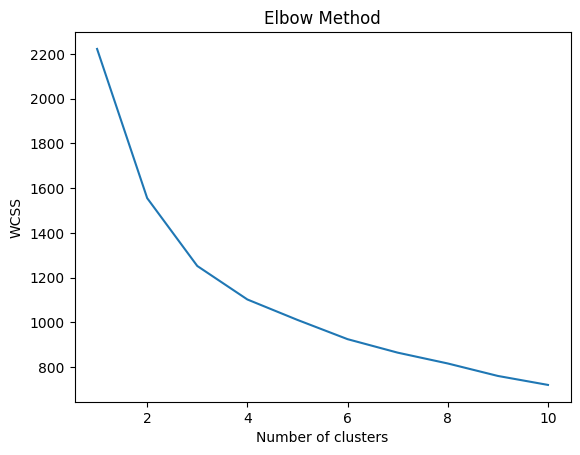

In [ ]:
hwcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


This helps us to settlle on the number of clusters which I found was 3

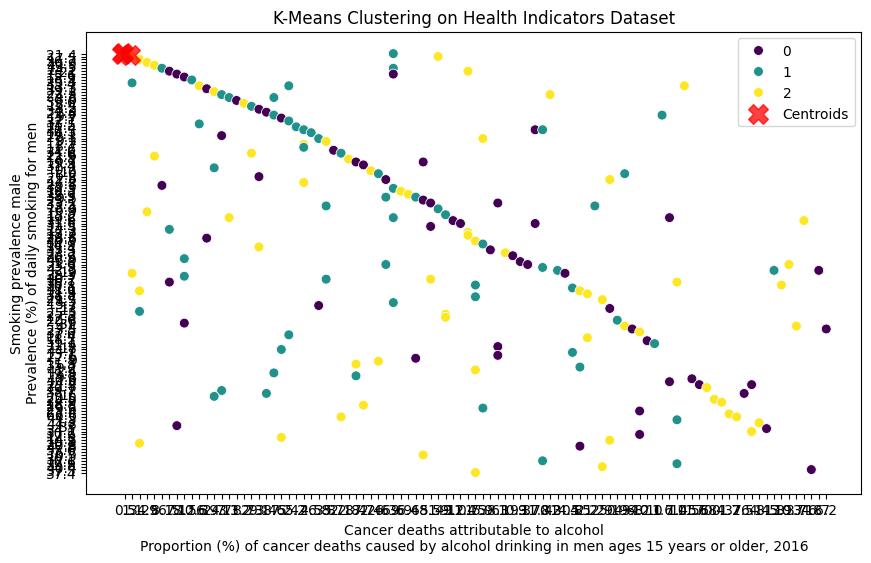

In [ ]:
#k-means clustering
#specifying number of clusters
n_clusters= 3
kmeans= KMeans(n_clusters=n_clusters, init='k-means++',random_state=42)
numeric_x['KMeans Cluster'] = kmeans.fit_predict(X_scaled)

#plotting Kmeans clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numeric_x.iloc[:, 0], y=numeric_x.iloc[:, 1], hue=numeric_x['KMeans Cluster'], palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering on Health Indicators Dataset')
plt.xlabel(numeric_x.columns[0])
plt.ylabel(numeric_x.columns[1])
plt.legend()
plt.show()




This scatterplot shows analysis on health indicators.
I'm focusing on two variables that is Proportion (%) of cancer deaths caused by alcohol drinking in men aged 15 years or older (2016) and Smoking prevalence for men (percentage of daily smoking).
I can pbserve that the plot has three clusters, represented by different colors (purple, green, yellow).
The red "X" marks represent the centroids of each cluster.
There appears to be a downward trend, suggesting a negative correlation between smoking prevalence and the proportion of cancer deaths caused by alcohol.






